In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np # linear algebra
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import GlobalMaxPooling1D, Conv1D, Dense, Embedding, Dropout,MaxPooling1D, LSTM
import matplotlib.pyplot as plt
import numpy as np # linear algebra
from keras.callbacks import EarlyStopping

from keras import regularizers
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score
import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import tensorflow 
from tensorflow.python.lib.io import file_io


Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

../input/finaldata/YouTube_Dadvar_2014.csv
../input/glove6b100dtxt/glove.6B.100d.txt


/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
data = pd.read_csv('../input/finaldata/YouTube_Dadvar_2014.csv')

In [3]:
data.head()

,UserIndex,Comments,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,Class,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(3464, 38)

In [5]:
data.ndim

2

In [6]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.shape

(3464, 9)

In [7]:
data.dtypes

UserIndex                object
Comments                 object
Number of Comments        int64
Number of Subscribers     int64
Membership Duration       int64
Number of Uploads         int64
Profanity in UserID       int64
Age                       int64
Class                     int64
dtype: object

In [8]:
data.isnull().any()

UserIndex                False
Comments                 False
Number of Comments       False
Number of Subscribers    False
Membership Duration      False
Number of Uploads        False
Profanity in UserID      False
Age                      False
Class                    False
dtype: bool

In [9]:
data.columns

Index(['UserIndex', 'Comments', 'Number of Comments', 'Number of Subscribers',
       'Membership Duration', 'Number of Uploads', 'Profanity in UserID',
       'Age', 'Class'],
      dtype='object')

In [10]:
data_dupli = data.drop_duplicates()
data=data_dupli
data.describe()

,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,Class
count,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.00000
mean,15.452367,304.318995,3.714781,10.288395,0.113164,24.879042,0.12067
std,10.862517,15520.532319,1.392837,28.646525,0.316839,13.286361,0.32579
min,1.000000,0.000000,2.000000,1.000000,0.000000,13.000000,0.00000
25%,6.000000,0.000000,3.000000,5.000000,0.000000,18.000000,0.00000
50%,14.000000,2.000000,3.000000,5.000000,0.000000,21.000000,0.00000
75%,23.000000,7.000000,4.000000,5.000000,0.000000,27.000000,0.00000
max,50.000000,912377.000000,9.000000,820.000000,1.000000,112.000000,1.00000


In [11]:
from sklearn.preprocessing import LabelEncoder
data['Class']=data['Class'].astype(str)
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

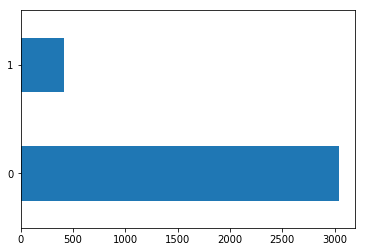

In [12]:
data['Class'].value_counts().plot(kind='barh')

In [13]:
import kernelprocess

df = kernelprocess.processing(data)
df.head()

,Comments,Class
0,do nebodyels hear crazi as screamin hoe every...,0
1,there mani thing incorrect comment unbeliev g...,0
2,hahah boyfriend show song me tooo be seizur o...,1
3,dick beyonc fuck as hole trueli dog bitch pha...,1
4,donghaetaemin kai a luhansehun bacon xd taemi...,0


In [14]:
from sklearn.utils import shuffle
file = shuffle(df, random_state=3)

In [15]:
Y = pd.DataFrame(file['Class'])
X = pd.DataFrame(file['Comments'])

In [16]:
#hold-out
Xtrain,Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.20, random_state=42)

In [17]:
Ytrain.shape

(2771, 1)

In [18]:
def plot_model_history(model_history):
        fig, axs = plt.subplots(1,2,figsize=(15,5))
        # summarize history for accuracy
        axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
        axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
        axs[0].set_title('Model Accuracy')
        axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
        axs[0].legend(['train', 'test'], loc='best')
        # summarize history for loss
        axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
        axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
        axs[1].set_title('Model Loss')
        axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
        axs[1].legend(['train', 'test'], loc='best')
        plt.show()

In [19]:
tokenizer = Tokenizer(num_words=None, split=' ',lower=False)
tokenizer.fit_on_texts(Xtrain['Comments'].values)
x = tokenizer.texts_to_sequences(Xtrain['Comments'].values)
wordindex = tokenizer.word_index
vocab_size = len(wordindex) + 1
tokentrain = pad_sequences(x, padding  = 'post', maxlen = 2771) #max comment length

In [20]:
tokenizer = Tokenizer(num_words=None, split=' ',lower=False)
tokenizer.fit_on_texts(Xtest['Comments'].values)
y = tokenizer.texts_to_sequences(Xtest['Comments'].values)
wordindex = tokenizer.word_index
vocab_size = len(wordindex) + 1
tokentest = pad_sequences(y, padding  = 'post', maxlen = 2771) #max comment length

In [23]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/finaldata/YouTube_Dadvar_2014.csv
/kaggle/input/glove6b100dtxt/glove.6B.100d.txt


In [24]:
import keras.backend as K
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


# load whole embedding into memory
print('Indexing word vectors.')
    
embeddings_index = {}
f = file_io.FileIO('../input/glove6b100dtxt/glove.6B.100d.txt', mode='r')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
    
print('Found %s word vectors.' % len(embeddings_index))
#emb_dim could be a parameter
    
all_embs = np.stack(embeddings_index.values())
emb_mean = all_embs.mean() 
emb_std = all_embs.std() 
emb_mean,emb_std
emb_dim=100
embedding_matrix = np.random.normal(emb_mean, emb_std, (vocab_size, emb_dim ))
for word, i in wordindex.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector


Indexing word vectors.
Found 400000 word vectors.


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 2771, 100)         1337800   
_________________________________________________________________
lstm_5 (LSTM)                (None, 2771, 102)         82824     
_________________________________________________________________
lstm_6 (LSTM)                (None, 2771, 92)          71760     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2768, 74)          27306     
_________________________________________________________________
dropout_5 (Dropout)          (None, 2768, 74)          0         
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 74)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74)                0         
__________

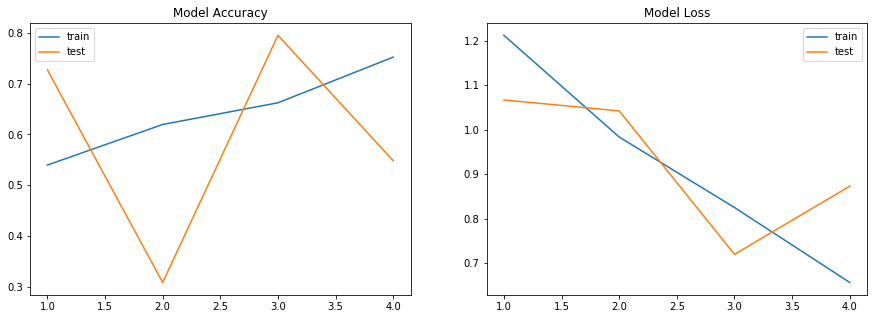

-----RandomOverSampling-----
LSTM-CNN Accuracy Score ->  54.83405483405483
              precision    recall  f1-score   support

           0       0.89      0.54      0.67       598
           1       0.17      0.60      0.27        95

    accuracy                           0.55       693
   macro avg       0.53      0.57      0.47       693
weighted avg       0.80      0.55      0.62       693

[[323 275]
 [ 38  57]]


In [27]:

#ramdomOverSample
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_sample(tokentrain, Ytrain)   
    
seed = 206#10 good
np.random.seed(seed)
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False, input_length = x_ros.shape[1]))
    
model.add(LSTM(102,return_sequences=True, activation='tanh'))#return_sequences=True
model.add(LSTM(92,return_sequences=True, activation='tanh'))#return_sequences=True
model.add(Conv1D(74, kernel_size=4, activation='tanh'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(20,activation = 'tanh', kernel_regularizer = regularizers.l2(0.02)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=(['accuracy']))#sentropy',loss= imbalancedloss
model.summary()
batch_size = 110
epochs =4 
        
model_history = model.fit(x_ros, y_ros, validation_data=(tokentest, Ytest),epochs=epochs, batch_size=batch_size, verbose=1)

accuracy = model.evaluate(tokentest, Ytest, verbose=False)
print("Testing Accuracy:  ",accuracy)

from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(tokentest)

plot_model_history(model_history)
print("-----RandomOverSampling-----")
print("LSTM-CNN Accuracy Score -> ",accuracy_score(y_pred, Ytest)*100)
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest,y_pred))
